![Title](img/gaih.png)


![Title](img/1.png)



## Data Analysis

### Steps of Analyzing the Data

* Gathering Data
* Preparing the Data
* Choosing Models
* Training
* Prediction
* Model Selection

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Gathering Data

After the problem definition, we need to obtain data which will be appropriate for our case. The quality and quantity of data that you gather will directly determine how good our predictive model can be.

### Preparing the Data


Data preparation, where we load our data into a suitable place and prepare it for use in our machine learning training. This is also a good time to do any pertinent visualizations of your data, to help you see if there are any relevant relationships between different variables you can take advantage of, as well as show you if there are any data imbalances.

### Exploratory Data Analysis (EDA)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.


![Title](img/eda.png)


### Loading the Data Set

In this real-life example, we are going to predict the price of a house according to Melbourne Housing data set. Before predicting any price, first, we begin with analyzing the data using preprocessing techniques.

In [2]:
data = pd.read_csv("data/Melbourne_housing_FULL.csv")
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [3]:
data.shape

(34857, 21)

In [4]:
data.size

731997

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [6]:
data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


In [7]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

### Convert objects to categorical values

We can change the type of each column as we desired. It is important to change these columns' type according to how we will use them.

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [9]:
# Covert objects to categorical variables
change_objects = ['Suburb', 'Address', 'Type', 'Method', 'SellerG', 'CouncilArea','Regionname']
for colname in change_objects:
    data[colname] = data[colname].astype('category')  

# Check it worked
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         34857 non-null  category
 1   Address        34857 non-null  category
 2   Rooms          34857 non-null  int64   
 3   Type           34857 non-null  category
 4   Price          27247 non-null  float64 
 5   Method         34857 non-null  category
 6   SellerG        34857 non-null  category
 7   Date           34857 non-null  object  
 8   Distance       34856 non-null  float64 
 9   Postcode       34856 non-null  float64 
 10  Bedroom2       26640 non-null  float64 
 11  Bathroom       26631 non-null  float64 
 12  Car            26129 non-null  float64 
 13  Landsize       23047 non-null  float64 
 14  BuildingArea   13742 non-null  float64 
 15  YearBuilt      15551 non-null  float64 
 16  CouncilArea    34854 non-null  category
 17  Lattitude      26881 non-null  

### Removing Duplicates
Bedroom2 and Rooms were duplicates. This has been illustrated below with Bedroom2 removed from the dataframe.

In [10]:
# Compare Rooms and Bedroom2 variables
data['Rooms v Bedroom2'] = data['Rooms'] - data['Bedroom2']
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Rooms v Bedroom2
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,0.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,0.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,0.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,0.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,0.0


In [11]:
# Drop Bedroom2 and Rooms v Bedroom2
data = data.drop(['Bedroom2', 'Rooms v Bedroom2'], 1)

In [12]:
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Outliers Detection

Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty. In other words, an outlier is an observation that diverges from an overall pattern on a sample.


![Title](img/iqr.png)


In [13]:
# Check min, max and mean of values to ensure it makes sense
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Rooms,34857.0,3.031012e+00,0.969933,1.00000,2.00000,3.0000,4.000000e+00,1.600000e+01
Price,27247.0,1.050173e+06,641467.130105,85000.00000,635000.00000,870000.0000,1.295000e+06,1.120000e+07
Distance,34856.0,1.118493e+01,6.788892,0.00000,6.40000,10.3000,1.400000e+01,4.810000e+01
Postcode,34856.0,3.116063e+03,109.023903,3000.00000,3051.00000,3103.0000,3.156000e+03,3.978000e+03
Bathroom,26631.0,1.624798e+00,0.724212,0.00000,1.00000,2.0000,2.000000e+00,1.200000e+01
Car,26129.0,1.728845e+00,1.010771,0.00000,1.00000,2.0000,2.000000e+00,2.600000e+01
Landsize,23047.0,5.935990e+02,3398.841946,0.00000,224.00000,521.0000,6.700000e+02,4.330140e+05
BuildingArea,13742.0,1.602564e+02,401.267060,0.00000,102.00000,136.0000,1.880000e+02,4.451500e+04
YearBuilt,15551.0,1.965290e+03,37.328178,1196.00000,1940.00000,1970.0000,2.000000e+03,2.106000e+03
Lattitude,26881.0,-3.781063e+01,0.090279,-38.19043,-37.86295,-37.8076,-3.775410e+01,-3.739020e+01


In [14]:
# Remove false BuildingArea
data = data[data['BuildingArea']!=0]

# Remove false YearBuilt (Melbourne Founded 1835)
data = data[data['YearBuilt']> 1835]

# Adding feature for house age 
### Domain bilgisinin üzerinde dur bahsederken
data['Age'] = 2020 - data['YearBuilt']
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,120.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,120.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,6.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,14.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,120.0


In [15]:
data = data.drop(['YearBuilt'], axis = 1)
data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,1.0,0.0,156.0,79.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,120.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,2.0,0.0,134.0,150.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,120.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,1.0,2.0,120.0,142.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,6.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,2.0,2.0,400.0,220.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0,14.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,1.0,2.0,201.0,NaN,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0,120.0


### Handling missing values

In [16]:
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3452
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            1
Car               250
Landsize         1815
BuildingArea     2313
CouncilArea         0
Lattitude           9
Longtitude          9
Regionname          0
Propertycount       0
Age                 0
dtype: int64

In [17]:
# Percentage of Missings in each columns
data.isnull().sum()/len(data)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price            22.309830
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bathroom          0.006463
Car               1.615718
Landsize         11.730111
BuildingArea     14.948620
CouncilArea       0.000000
Lattitude         0.058166
Longtitude        0.058166
Regionname        0.000000
Propertycount     0.000000
Age               0.000000
dtype: float64

In [18]:
data.shape

(15473, 20)

In [19]:
data = data.dropna(subset=['Lattitude', 'Longtitude', 'Bathroom', 'Car'])
data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price            3394
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bathroom            0
Car                 0
Landsize         1760
BuildingArea     2282
CouncilArea         0
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
Age                 0
dtype: int64

### Distributions

![Title](img/dist.png)

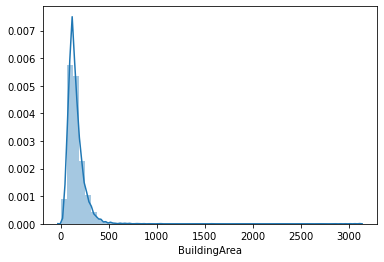

In [20]:
sns.distplot(data['BuildingArea'])
plt.show()

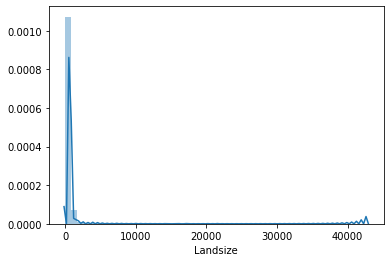

In [21]:
sns.distplot(data['Landsize'])
plt.show()

In [22]:
not_null = ['BuildingArea', 'Landsize']

for colname in not_null:
    data[colname].fillna(data[colname].median(), inplace = True)

In [23]:
data.shape

(15214, 20)

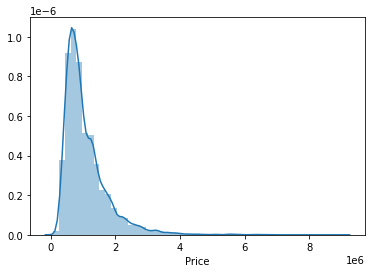

In [24]:
data = data.dropna(subset=['Price'])
sns.distplot(data['Price'])
plt.show()

### Duplicated values

In [25]:
# Check for duplicate data
duplicate = data.duplicated()
print(duplicate.sum())
data[duplicate]

0


,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Age


In [26]:
data.drop_duplicates(inplace = True)
data.duplicated().sum()

0

### Data Visualization

#### Histogram in House Price

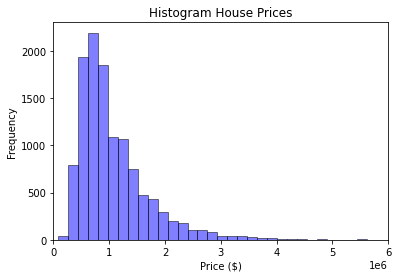

In [27]:
# Build Histogram to visualise price distribution
num_bins = 50
n, bins, patches = plt.hist(data.Price, num_bins, color='b', alpha=0.5, histtype = 'bar', ec = 'black')
plt.ylabel ('Frequency')
plt.xlabel ('Price ($)')
plt.xlim([0, 6000000])
plt.title ('Histogram House Prices')
plt.show()

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11820 entries, 2 to 34856
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Suburb         11820 non-null  category
 1   Address        11820 non-null  category
 2   Rooms          11820 non-null  int64   
 3   Type           11820 non-null  category
 4   Price          11820 non-null  float64 
 5   Method         11820 non-null  category
 6   SellerG        11820 non-null  category
 7   Date           11820 non-null  object  
 8   Distance       11820 non-null  float64 
 9   Postcode       11820 non-null  float64 
 10  Bathroom       11820 non-null  float64 
 11  Car            11820 non-null  float64 
 12  Landsize       11820 non-null  float64 
 13  BuildingArea   11820 non-null  float64 
 14  CouncilArea    11820 non-null  category
 15  Lattitude      11820 non-null  float64 
 16  Longtitude     11820 non-null  float64 
 17  Regionname     11820 non-null  

#### Seaborn PairPlot

In [29]:
data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bathroom', 'Car', 'Landsize',
       'BuildingArea', 'CouncilArea', 'Lattitude', 'Longtitude', 'Regionname',
       'Propertycount', 'Age'],
      dtype='object')

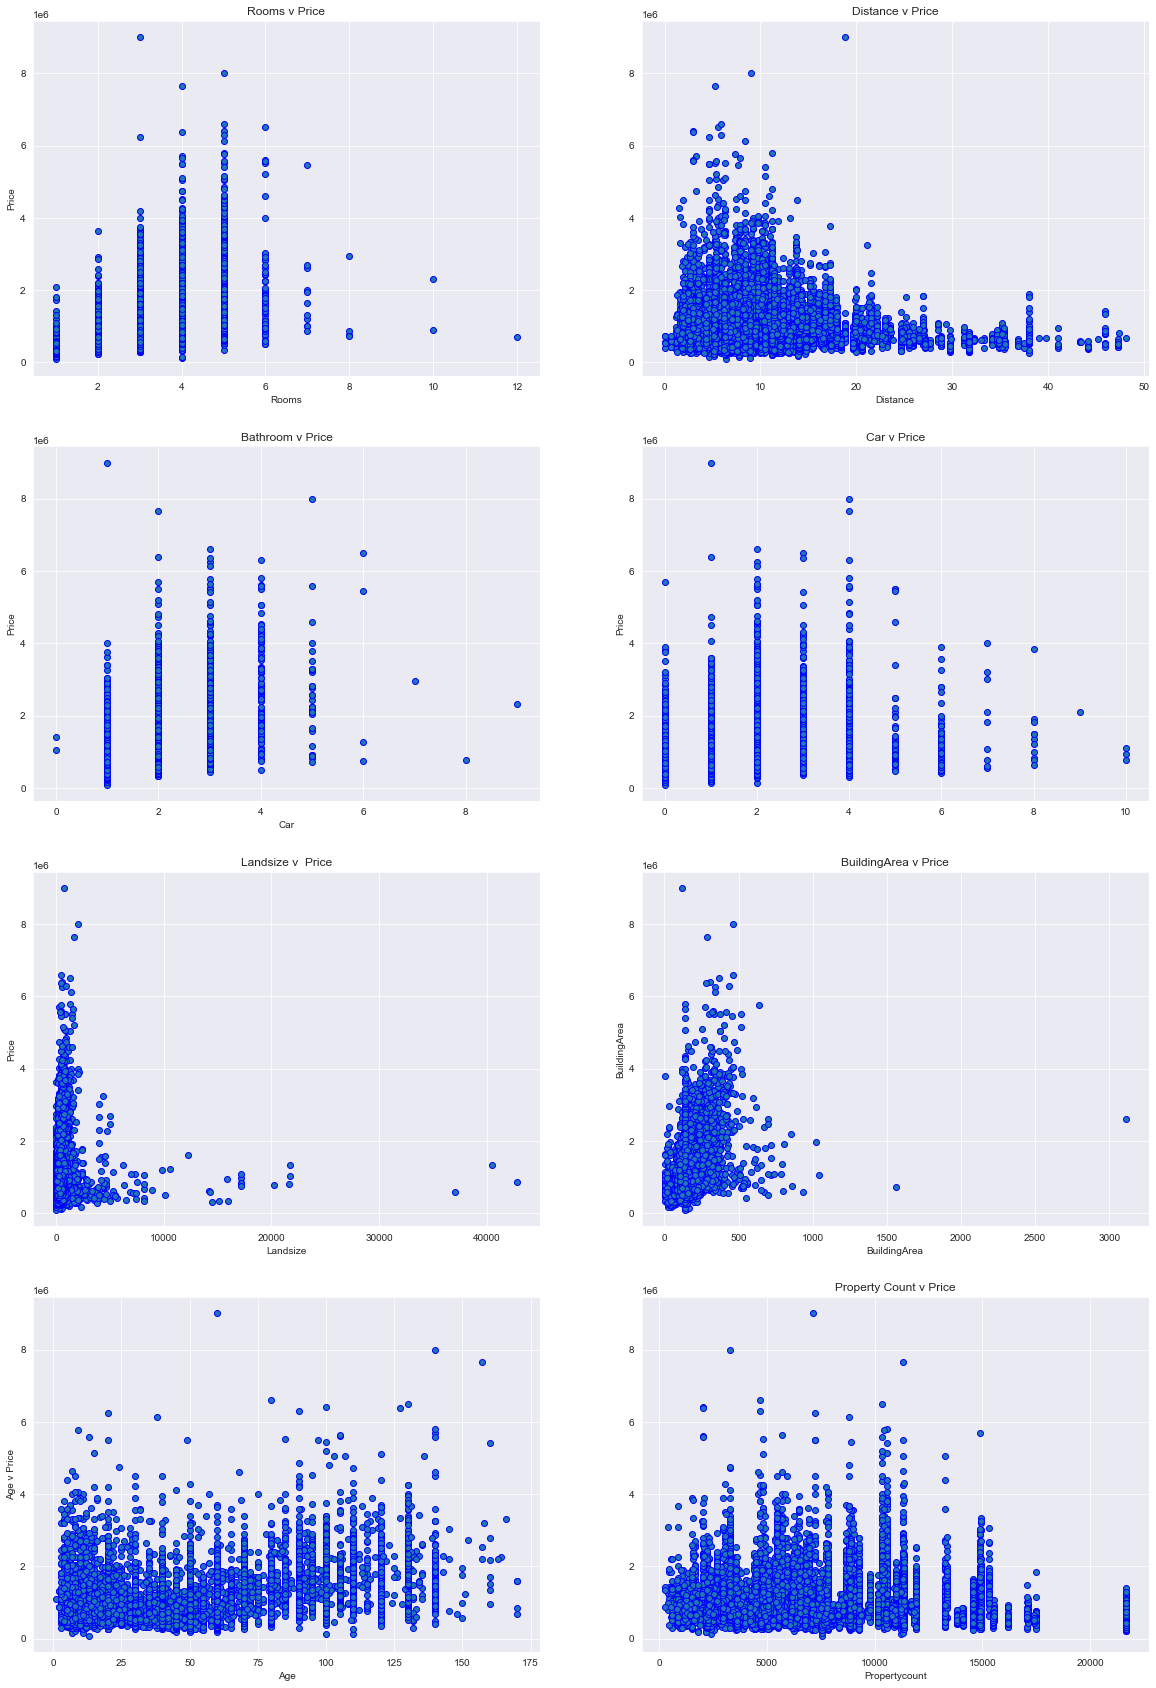

In [30]:
# Suplots of numeric features v price
sns.set_style('darkgrid')
f, axes = plt.subplots(4,2, figsize = (20,30))

# Plot [0,0]
axes[0,0].scatter(x = 'Rooms', y = 'Price', data = data, edgecolor = 'b')
axes[0,0].set_xlabel('Rooms')
axes[0,0].set_ylabel('Price')
axes[0,0].set_title('Rooms v Price')

# Plot [0,1]
axes[0,1].scatter(x = 'Distance', y = 'Price', data = data, edgecolor = 'b')
axes[0,1].set_xlabel('Distance')
# axes[0,1].set_ylabel('Price')
axes[0,1].set_title('Distance v Price')

# Plot [1,0]
axes[1,0].scatter(x = 'Bathroom', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Bathroom')
axes[1,0].set_ylabel('Price')
axes[1,0].set_title('Bathroom v Price')
# Plot [1,1]
axes[1,1].scatter(x = 'Car', y = 'Price', data = data, edgecolor = 'b')
axes[1,0].set_xlabel('Car')
axes[1,1].set_ylabel('Price')
axes[1,1].set_title('Car v Price')

# Plot [2,0]
axes[2,0].scatter(x = 'Landsize', y = 'Price', data = data, edgecolor = 'b')
axes[2,0].set_xlabel('Landsize')
axes[2,0].set_ylabel('Price')
axes[2,0].set_title('Landsize v  Price')

# Plot [2,1]
axes[2,1].scatter(x = 'BuildingArea', y = 'Price', data = data, edgecolor = 'b')
axes[2,1].set_xlabel('BuildingArea')
axes[2,1].set_ylabel('BuildingArea')
axes[2,1].set_title('BuildingArea v Price')

# Plot [3,0]
axes[3,0].scatter(x = 'Age', y = 'Price', data = data, edgecolor = 'b')
axes[3,0].set_xlabel('Age')
axes[3,0].set_ylabel('Price')
axes[3,0].set_ylabel('Age v Price')
# Plot [3,1]
axes[3,1].scatter(x = 'Propertycount', y = 'Price', data = data, edgecolor = 'b')
axes[3,1].set_xlabel('Propertycount')
#axes[3,1].set_ylabel('Price')
axes[3,1].set_title('Property Count v Price')

plt.show()

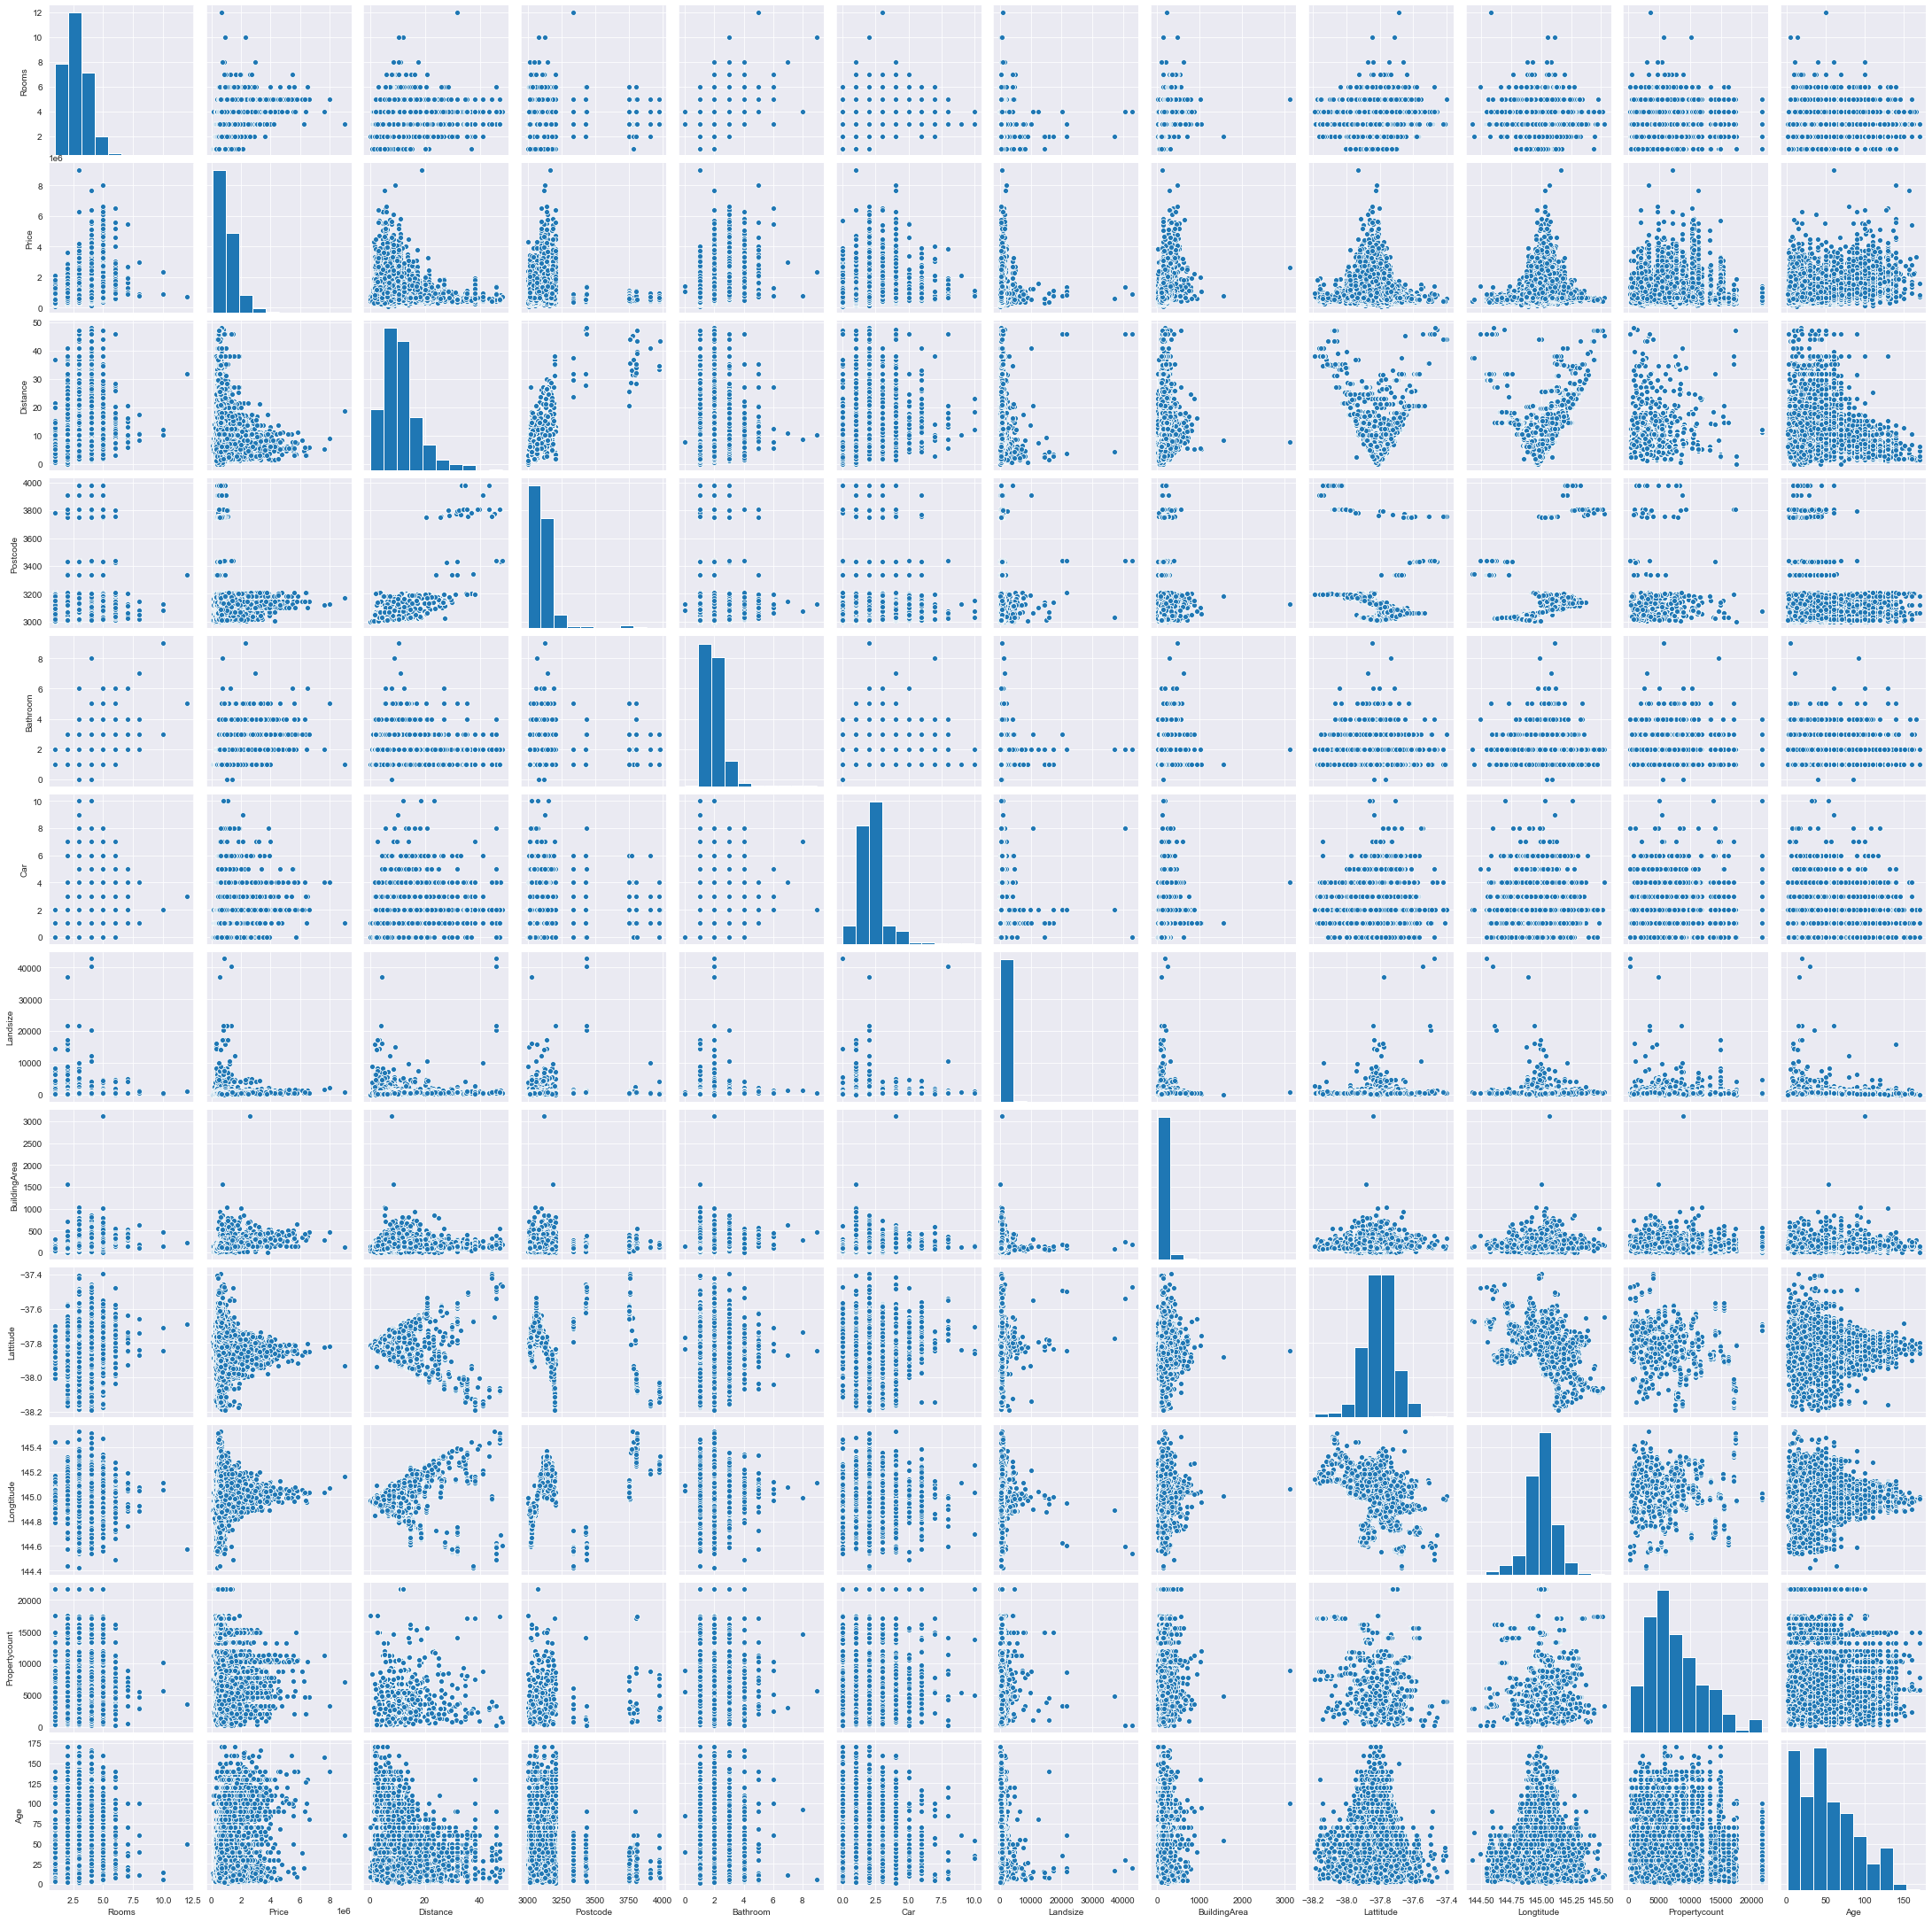

In [31]:
sns.pairplot(data)                                        

#### Correlation Matrix

Text(0.5, 1.0, 'Correlation')

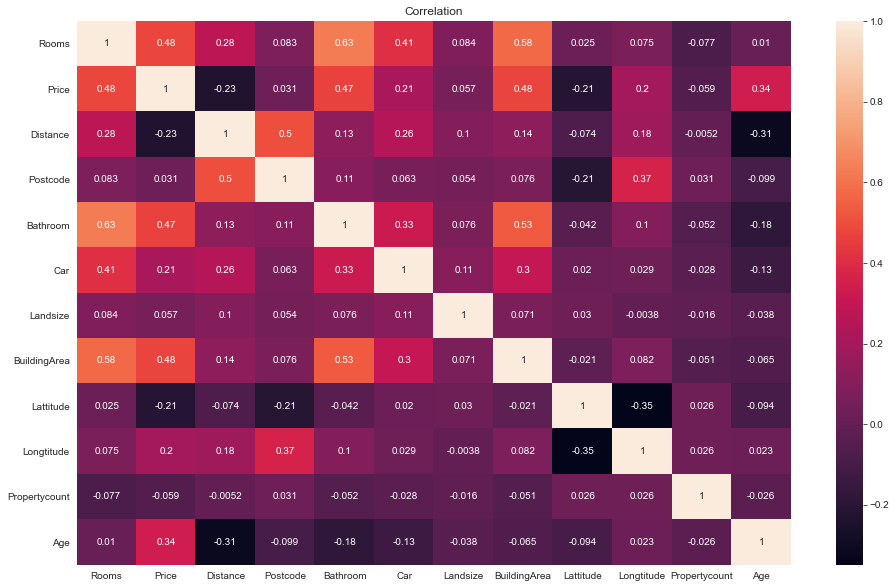

In [32]:
# Correlation Inspection
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(), annot= True)
plt.title('Correlation')

### Categorical Data vs Numerical Data

In [33]:
data = data.drop(['Address', 'SellerG','Date'], axis = 1)

In [34]:
obj_df = data.select_dtypes(include=['category']).copy()
obj_df.head()

,Suburb,Type,Method,CouncilArea,Regionname
2,Abbotsford,h,S,Yarra City Council,Northern Metropolitan
4,Abbotsford,h,SP,Yarra City Council,Northern Metropolitan
6,Abbotsford,h,VB,Yarra City Council,Northern Metropolitan
11,Abbotsford,h,S,Yarra City Council,Northern Metropolitan
14,Abbotsford,h,S,Yarra City Council,Northern Metropolitan


### Types of Data

<img src="img/data_types.png" width="600"/>

In [40]:
obj_df = data.select_dtypes(include=['category']).copy()
obj_df.head()

,Suburb,Type,Method,CouncilArea,Regionname
2,Abbotsford,h,S,Yarra City Council,Northern Metropolitan
4,Abbotsford,h,SP,Yarra City Council,Northern Metropolitan
6,Abbotsford,h,VB,Yarra City Council,Northern Metropolitan
11,Abbotsford,h,S,Yarra City Council,Northern Metropolitan
14,Abbotsford,h,S,Yarra City Council,Northern Metropolitan


### Label Encoder

Label Encoding is converting labels/words into numeric form.    
    
<img src="img/label_encoder.png" width="600"/>

### One-Hot Encoder

One-hot encoding is the representation of categorical variables as binary vectors.  Using one-hot encoding increases the dimensionality of the data set while label encoding doesn’t affect the dimensionality of the data set.

<img src="img/onehot_encoder.png" width="600"/>


In [43]:
data_encoded = pd.get_dummies(data = obj_df, drop_first= True)
data_encoded

,Suburb_Aberfeldie,Suburb_Airport West,Suburb_Albanvale,Suburb_Albert Park,Suburb_Albion,Suburb_Alphington,Suburb_Altona,Suburb_Altona Meadows,Suburb_Altona North,Suburb_Ardeer,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
11,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34847,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
34849,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
34853,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
34854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
data.drop(['Type','Method','CouncilArea','Regionname','Suburb'], axis = 1, inplace = True)
data.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,Age
2,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,4019.0,120.0
4,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,4019.0,120.0
6,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,4019.0,6.0
11,3,1876000.0,2.5,3067.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,4019.0,110.0
14,2,1636000.0,2.5,3067.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,4019.0,130.0


In [45]:
data = data.join(data_encoded)
data.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,...,0,1,0,0,1,0,0,0,0,0
11,3,1876000.0,2.5,3067.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,...,0,1,0,0,1,0,0,0,0,0
14,2,1636000.0,2.5,3067.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,...,0,1,0,0,1,0,0,0,0,0


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11820 entries, 2 to 34856
Columns: 411 entries, Rooms to Regionname_Western Victoria
dtypes: float64(11), int64(1), uint8(399)
memory usage: 6.0 MB


### Train a Model

<img src="img/model_training.png" width="600"/>


In [47]:
data.head()

,Rooms,Price,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,1035000.0,2.5,3067.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,...,0,1,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3067.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,...,0,1,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3067.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,...,0,1,0,0,1,0,0,0,0,0
11,3,1876000.0,2.5,3067.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,...,0,1,0,0,1,0,0,0,0,0
14,2,1636000.0,2.5,3067.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,...,0,1,0,0,1,0,0,0,0,0


In [48]:
X = data.loc[:, data.columns != 'Price']
X.head()

,Rooms,Distance,Postcode,Bathroom,Car,Landsize,BuildingArea,Lattitude,Longtitude,Propertycount,...,CouncilArea_Wyndham City Council,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
2,2,2.5,3067.0,1.0,0.0,156.0,79.0,-37.8079,144.9934,4019.0,...,0,1,0,0,1,0,0,0,0,0
4,3,2.5,3067.0,2.0,0.0,134.0,150.0,-37.8093,144.9944,4019.0,...,0,1,0,0,1,0,0,0,0,0
6,4,2.5,3067.0,1.0,2.0,120.0,142.0,-37.8072,144.9941,4019.0,...,0,1,0,0,1,0,0,0,0,0
11,3,2.5,3067.0,2.0,0.0,245.0,210.0,-37.8024,144.9993,4019.0,...,0,1,0,0,1,0,0,0,0,0
14,2,2.5,3067.0,1.0,2.0,256.0,107.0,-37.8060,144.9954,4019.0,...,0,1,0,0,1,0,0,0,0,0


In [52]:
y = data['Price']
y

2        1035000.0
4        1465000.0
6        1600000.0
11       1876000.0
14       1636000.0
           ...    
34847     500000.0
34849     570000.0
34853     888000.0
34854     705000.0
34856    1020000.0
Name: Price, Length: 11820, dtype: float64

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123)

### Gradient Boosting

Accuracy of train: 0.8444149269392157
Accuracy of test: 0.811182841285486


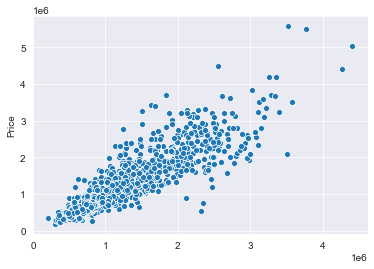

In [53]:
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

print("Accuracy of train:", clf.score(X_train, y_train))
print("Accuracy of test:", clf.score(X_test, y_test))

y_pred = clf.predict(X_test)

fig, axes = plt.subplots()
axes = sns.scatterplot(y_pred, y_test)

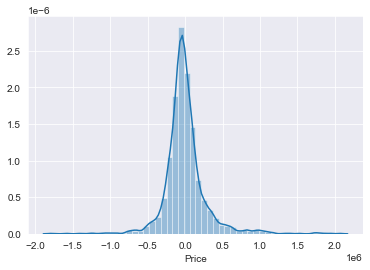

In [54]:
fig, axes = plt.subplots()
axes = sns.distplot((y_test - y_pred))

### Comparing with other models

In [55]:
# Imports
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn import metrics

In [56]:
# Models Object
models = {
    'Lasso': {
        'model': Lasso()
    },
    'LinearRegression': {
        'model': LinearRegression()
    },
    'Ridge': {
        'model': Ridge()
    },
    'ElasticNet': {
        'model': ElasticNet()
    },
    'KNeighborsRegressor': {
        'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
        'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
        'model': AdaBoostRegressor(n_estimators = 5, learning_rate = 1.2, loss = 'exponential', random_state = 2)
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(max_depth = 9, min_samples_split = 4, random_state = 1)
    }
}

In [73]:
# Add dictionary attributes
for model in models:
    models[model]['prediction'] = None
    models[model]['errors'] = {
        'mae': None,
        'mse': None,
        'rmse': None
    }
    models[model]['scores'] = {
        'r2': None
    }

In [74]:
# Let's try our luck with a bunch of models
for model in models:
    print('Running ', models[model]['model'])
    models[model]['model'].fit(X_train, y_train)
    models[model]['predictions'] = models[model]['model'].predict(X_test)
    models[model]['errors']['mae'] = metrics.mean_absolute_error(y_test, models[model]['predictions'])
    models[model]['errors']['mse'] = metrics.mean_squared_error(y_test, models[model]['predictions'])
    models[model]['errors']['rmse'] = np.sqrt(models[model]['errors']['mse'])
    models[model]['scores']['r2'] = metrics.r2_score(y_test, models[model]['predictions'])
    print('MAE: ', models[model]['errors']['mae'])
    print('MSE: ', models[model]['errors']['mse'])
    print('RMSE: ', models[model]['errors']['rmse'])
    print('R2: ', models[model]['scores']['r2'])
    print('\n')

Running  Lasso()
MAE:  263173.0725049406
MSE:  143769933485.44632
RMSE:  379170.0587934737
R2:  0.6453957193359159


Running  LinearRegression()
MAE:  263356.99694802304
MSE:  143867936440.79834
RMSE:  379299.27028772194
R2:  0.6451539979506231


Running  Ridge()
MAE:  262407.5083471728
MSE:  142938689907.9427
RMSE:  378072.3342271194
R2:  0.6474459569879154


Running  ElasticNet()
MAE:  282995.9829156915
MSE:  166380874660.04605
RMSE:  407898.11799032125
R2:  0.5896265029498731


Running  KNeighborsRegressor()
MAE:  240348.95956006768
MSE:  159101950857.6836
RMSE:  398875.8589557453
R2:  0.60757975281492


Running  RandomForestRegressor()
MAE:  157996.75613729758
MSE:  70683405433.3759
RMSE:  265863.50902930606
R2:  0.8256614750320703


Running  GradientBoostingRegressor()
MAE:  174845.3999011023
MSE:  78129121630.11021
RMSE:  279515.8700863159
R2:  0.8072968366687983


Running  AdaBoostRegressor(learning_rate=1.2, loss='exponential', n_estimators=5,
                  random_state=2)


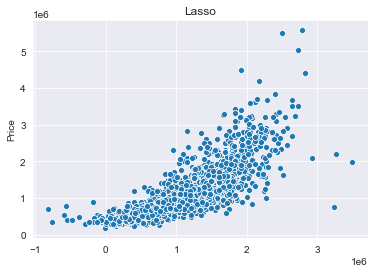

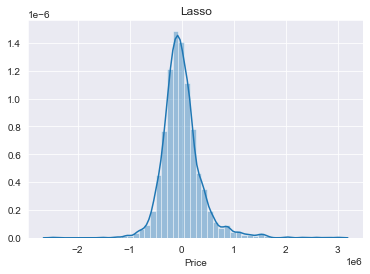

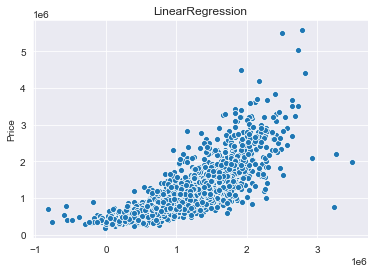

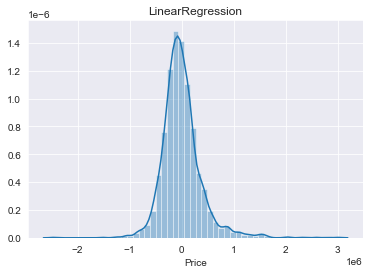

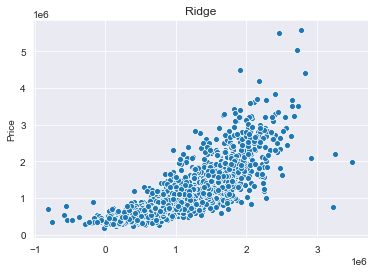

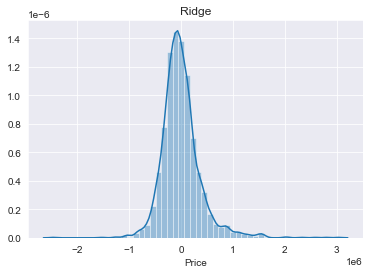

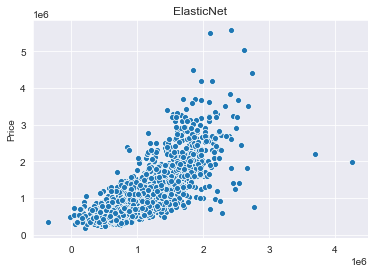

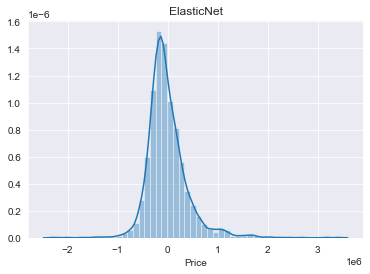

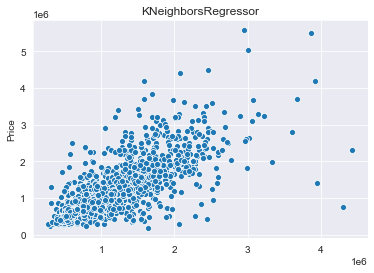

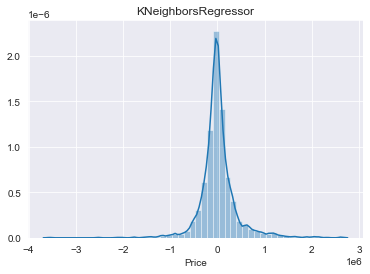

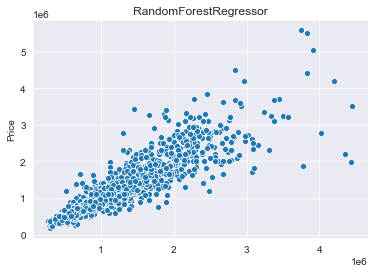

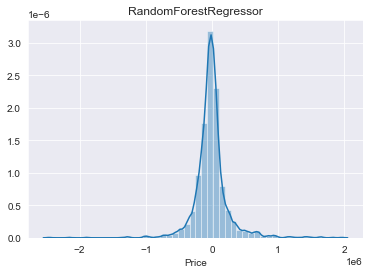

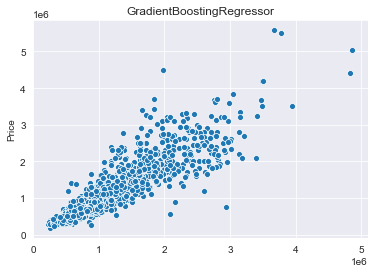

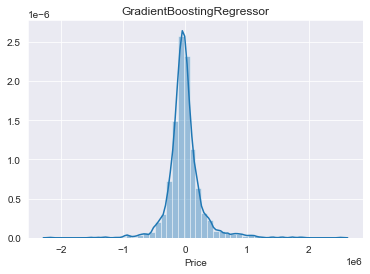

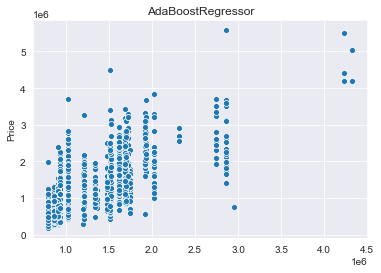

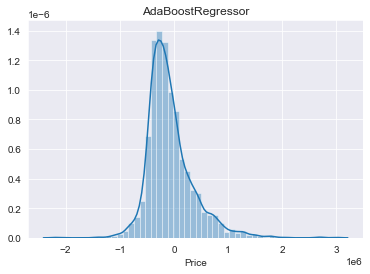

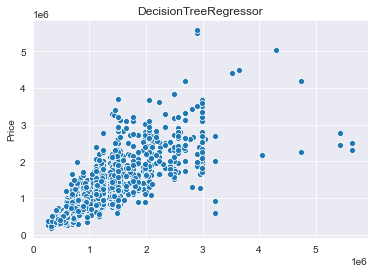

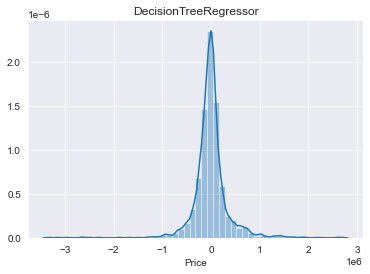

In [75]:
# Analyse the Residuals
for index, model in enumerate(models):
    sns.scatterplot(models[model]['predictions'], y_test)
    plt.title(model)
    plt.show()
    sns.distplot((y_test - models[model]['predictions']))
    plt.title(model)
    plt.show()